# Tutorial

In this tutorial, we will learn how to use three modules in the quantnote package: DataLoader, BacktestEngine, and Strategy. First, let us import the modules.

In [1]:
from quantnote import DataLoader, BacktestEngine, Strategy

## 1. DataLoader

DataLoader is a module to set universe and download the corresponding data from various data sources. Depending on the API keys you have, you can call the DataLoader in the following three ways. This tutorial does not need any API key.

In [2]:
# The simplest way to load data.
DL_1 = DataLoader(
    size=10, # size determines the number of companies in your universe.
    db_name='./myDB.db' # db_name determines the path that the donwloaded dataset will be saved.
) 

# In case you have fred API key. You can access to the macroeconomic dataset.
# DL_2 = DataLoader(fred_key = 'fred_key', size=10, db_name='./myDB.db') 

# In case you have quandl API key subscribed to the Sharadar equity bundle. You can construct the universe without look-ahead bias.
# DL_3 = DataLoader(quandl_key = 'quandl_key', fred_key = 'fred_key', size=10, db_name='./myDB.db')

[update_universe_yf] is executed in 0.00 seconds
[update_fundamentals_yf] is executed in 37.13 seconds
[*********************100%***********************]  19 of 19 completed
[update_market_yf] is executed in 4.21 seconds
[update_ticker_yf] is executed in 36.21 seconds
[update_metric_yf] is executed in 0.10 seconds
[update_data] is executed in 77.65 seconds


C:\Users\earen\Anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


DB has data from 1927-12-30 00:00:00 to 2021-08-27 00:00:00
Data saved in ./myDB.db
[save_db] is executed in 2.26 seconds


When constructing the historical universe for backtesting, it is crucial to avoid look-ahead bias. For DL_1 and DL_2 above, their universe is given by the companies in the current S&P 500 constituents with top-N market capitalization (N=size). For DL_3, however, its universe is given by the companies of top-N market capitalization with fixed size, but its constituents change dynamically in monthly basis.

## 2. BacktestEngine

BacktestEngine is a main module to run backtest. It needs database file retrieved from the DataLoader module.

In [3]:
engine = BacktestEngine(db_name = './myDB.db')

Loading DB...
FRED data does not exsit
DB loaded in 0.82 seconds
[initialize] is executed in 4.17 seconds


### 2.1. Check cache data

BacktestEngine saves the DB data in 'cache' variable. Cache takes the form of {key1 : {key2 : pd.DataFrame} }  Here, key1 is one of market, metric, fundamentals, and tickerinfo. key2 is one of the tickers of the company in our universe. Let's see what's inside the cache.

First, 'market' table shows historical adjusted OHLC and volume.

In [4]:
engine.cache['market']['AAPL']

,open,high,low,close,volume,ticker
date,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600.0,AAPL
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800.0,AAPL
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000.0,AAPL
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600.0,AAPL
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600.0,AAPL
...,...,...,...,...,...,...
2021-08-23,148.309998,150.190002,147.889999,149.710007,60131800.0,AAPL
2021-08-24,149.449997,150.860001,149.149994,149.619995,48606400.0,AAPL
2021-08-25,149.809998,150.320007,147.800003,148.360001,58991300.0,AAPL


Second, 'fundamentals' table shows the financial statement of the company.

In [5]:
engine.cache['fundamentals']['AAPL']

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Other Cashflows From Investing Activities,Dividends Paid,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures,ticker,Capital Surplus,Deferred Long Term Liab
datekey,,,,,,,,,,,,,,,,,,,,,
2017-09-30,1.158100e+10,None,6.408900e+10,NaN,4.835100e+10,1.526100e+10,8.818600e+10,6.134400e+10,6.134400e+10,NaN,...,-1.240000e+08,-1.276900e+10,-2.723000e+09,-2.093000e+09,-105000000.0,1.064000e+10,-1.245100e+10,AAPL,NaN,NaN
2018-09-29,1.423600e+10,None,7.290300e+10,NaN,5.953100e+10,1.670500e+10,1.018390e+11,7.089800e+10,7.089800e+10,NaN,...,-7.450000e+08,-1.371200e+10,8.280000e+08,-5.322000e+09,-105000000.0,-2.769400e+10,-1.331300e+10,AAPL,NaN,NaN
2019-09-28,1.621700e+10,None,6.573700e+10,NaN,5.525600e+10,1.824500e+10,9.839200e+10,6.393000e+10,6.393000e+10,NaN,...,-1.078000e+09,-1.411900e+10,-2.890000e+08,2.450000e+08,-105000000.0,5.076000e+09,-1.049500e+10,AAPL,NaN,NaN
2020-09-26,1.875200e+10,None,6.709100e+10,NaN,5.741100e+10,1.991600e+10,1.049560e+11,6.628800e+10,6.628800e+10,NaN,...,-7.910000e+08,-1.408100e+10,-1.270000e+08,6.917000e+09,-126000000.0,6.517000e+09,-7.309000e+09,AAPL,NaN,NaN


As you can see, the fundamentals table has a lengthy columns. Those information contain:

In [6]:
engine.cache['fundamentals']['AAPL'].columns

Index(['Research Development', 'Effect Of Accounting Charges',
       'Income Before Tax', 'Minority Interest', 'Net Income',
       'Selling General Administrative', 'Gross Profit', 'Ebit',
       'Operating Income', 'Other Operating Expenses', 'Interest Expense',
       'Extraordinary Items', 'Non Recurring', 'Other Items',
       'Income Tax Expense', 'Total Revenue', 'Total Operating Expenses',
       'Cost Of Revenue', 'Total Other Income Expense Net',
       'Discontinued Operations', 'Net Income From Continuing Ops',
       'Net Income Applicable To Common Shares', 'Intangible Assets',
       'Total Liab', 'Total Stockholder Equity', 'Other Current Liab',
       'Total Assets', 'Common Stock', 'Other Current Assets',
       'Retained Earnings', 'Other Liab', 'Good Will', 'Treasury Stock',
       'Other Assets', 'Cash', 'Total Current Liabilities',
       'Deferred Long Term Asset Charges', 'Short Long Term Debt',
       'Other Stockholder Equity', 'Property Plant Equipment',
   

Third, 'metric' table shows the daily metric of the company. Without the quandl API key, it only shows daily market cap data.

In [7]:
engine.cache['metric']['AAPL']

,marketcap,ticker
date,,
1980-12-12,1.662939e+09,AAPL
1980-12-15,1.576182e+09,AAPL
1980-12-16,1.460494e+09,AAPL
1980-12-17,1.496643e+09,AAPL
1980-12-18,1.540034e+09,AAPL
...,...,...
2021-08-23,2.474736e+12,AAPL
2021-08-24,2.473248e+12,AAPL
2021-08-25,2.452421e+12,AAPL


Lastly, tickerinfo table shows the information of the ticker. Without the quandl API key, it only shows sector information.

In [8]:
engine.cache['tickerinfo']['AAPL']

,ticker,sector
permaticker,,
3.0,AAPL,Technology


If you have FRED API key, cache will have 'macro' table also. Check it out later if you have fred api key.

In [9]:
# engine.cache['macro']

### 2.2. Write down Strategy

With the cache data above, you can construct investment strategy. BacktestEngine module will show sample code for the simple strategy class. Also you need is copy and paste the code below to write down your own code.

In [10]:
engine.show_sample_strategy()

class myStrategy(Strategy):
    def __init__(self):
        super().__init__()

    def compute_target(self, universe_list):
        target_weight = { }
        for ticker in universe_list:
            target_weight[ticker] = 1
        target_weight = self.normalize(target_weight)
        return target_weight

    def custom_factor(self, ticker, ftype):
        if ftype == 'marketcap':
            return self.get_value('metric',ticker,'marketcap')
        else:
            assert False



## 3. Stretegy

We begin by copy & paste the code above. The sample codes gives equal weight to all tickers in universe.

In [11]:
class myStrategy(Strategy):
    def __init__(self):
        super().__init__()

    def compute_target(self, universe_list):
        target_weight = { }
        for ticker in universe_list:
            target_weight[ticker] = 1
            # our strategy gives equal weight for all tickers in universe
            
        target_weight = self.normalize(target_weight)
        # the target weight should be normalized so that their sum is equal to 1
        return target_weight

    def custom_factor(self, ticker, ftype):
        if ftype == 'marketcap':
            return self.get_value('metric',ticker,'marketcap')
        else:
            assert False

In [12]:
EW = myStrategy()

### 3.1. Run backtest

Now you can run backtest as follows.

In [13]:
engine.run_backtest(
    strategy = EW, sdate = '2018-01-01', edate = '2021-08-27')

Backtest period: 2018-01-02 00:00:00 -- 2021-08-27 00:00:00
=== date:2021-08-27 00:00:00 / total_asset:3.202 / time elapsed:3.6 ===
[run_backtest] is executed in 3.83 seconds


The asset allocation history during your backteset is stored in the engine.asset_df variable.

In [14]:
asset_df = engine.asset_df

asset_df

,cash,MSFT,NVDA,AAPL,BRK.B,GOOGL,FB,TSLA,JPM,JNJ,AMZN
2018-01-02,0.0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2018-01-03,0.0,0.100465,0.106581,0.099983,0.101303,0.101706,0.101791,0.098977,0.100102,0.100955,0.101278
2018-01-04,0.0,0.101350,0.107143,0.100447,0.101759,0.102101,0.101604,0.098156,0.101536,0.100948,0.101731
2018-01-05,0.0,0.102606,0.108051,0.101591,0.102130,0.103455,0.102993,0.098768,0.100884,0.101781,0.103375
2018-01-08,0.0,0.102711,0.111362,0.101213,0.102799,0.103820,0.103781,0.104954,0.101033,0.101910,0.104866
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,0.0,0.327564,0.339829,0.314929,0.313877,0.317414,0.315558,0.304206,0.316838,0.317004,0.299637
2021-08-24,0.0,0.325381,0.337275,0.314740,0.314317,0.320179,0.317433,0.305149,0.318800,0.313042,0.303299
2021-08-25,0.0,0.324725,0.343775,0.312089,0.315723,0.322032,0.319935,0.306316,0.325371,0.310972,0.302694
2021-08-26,0.0,0.321585,0.341531,0.310364,0.313492,0.320585,0.316452,0.301992,0.327049,0.309312,0.304237


### 3.2. Visualize results

Backtest engine module has some visualization functions. Check it out below. The result looks awesome, but note that our universe is set to be the top 10 largest company at 2021-Aug. Investing in such companies from 2018 definitely gives the outperforming result contaminated with the look-ahead bias.

C:\Users\earen\Anaconda3\lib\site-packages\quantnote\backtest_engine.py:368: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


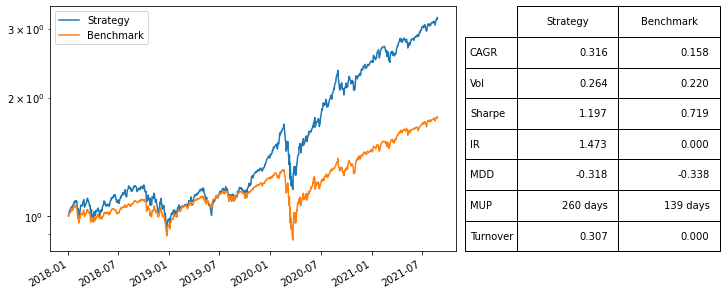

In [15]:
engine.show_report(benchmark='^SP500TR') 
# ^SP500TR is the index ticker for S&P 500 total return index. It can be found at yahoo finance.

# CAGR = annual return
# Vol = annual volatility
# Sharpe = annualized Sharpe ratio
# IR = Information ratio relative to the benchmark
# MDD = max drawdown
# MUP = max underwater period
# Turnover = average 1 year turnover

C:\Users\earen\Anaconda3\lib\site-packages\quantnote\backtest_engine.py:471: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


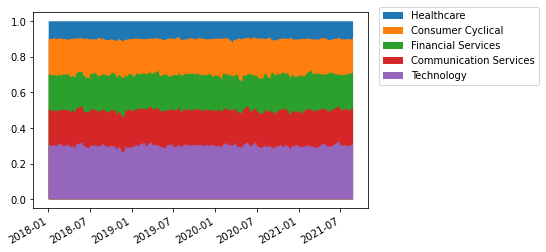

In [16]:
engine.show_sectorflow()

### 3.3. Modify your strategy.

Now, let us modify the above equal-weight strategy to the cap-weighted strategy. In the code below, we set our targe weight proportional to their market capitalization.

In [17]:
class myStrategy(Strategy):
    def __init__(self):
        super().__init__()

    def compute_target(self, universe_list):
        target_weight = { }
        for ticker in universe_list:
            target_weight[ticker] = self.get_value(
                table = 'metric',
                ticker = ticker,
                value = 'marketcap')
            """
            Strategy class receives the cache information of the BacktesteEngine class. 
            Its value can be obtained by using self.get_value method. 
            It will automatically return the most recent value obtainable at the date where the Strategy class computes the weight.
            """
        target_weight = self.normalize(target_weight)
        return target_weight

    def custom_factor(self, ticker, ftype):
        if ftype == 'marketcap':
            return self.get_value('metric',ticker,'marketcap')
        else:
            assert False

In [18]:
CW = myStrategy()

engine.run_backtest(
    strategy = CW, sdate = '2018-01-01', edate = '2021-08-27')

Backtest period: 2018-01-02 00:00:00 -- 2021-08-27 00:00:00
=== date:2021-08-27 00:00:00 / total_asset:2.802 / time elapsed:3.6 ===
[run_backtest] is executed in 3.78 seconds


C:\Users\earen\Anaconda3\lib\site-packages\quantnote\backtest_engine.py:368: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\earen\Anaconda3\lib\site-packages\quantnote\backtest_engine.py:471: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


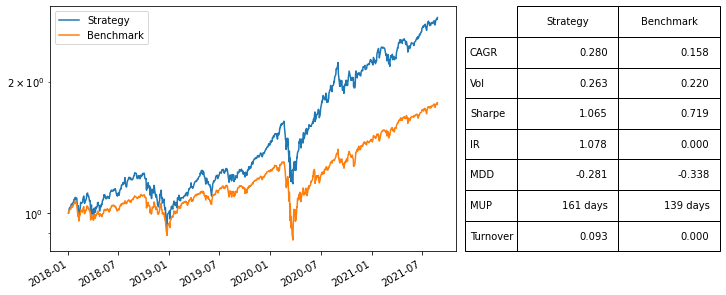

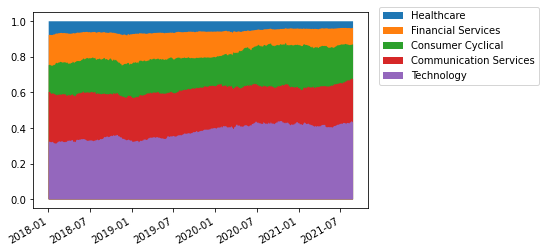

In [19]:
engine.show_report(benchmark='^SP500TR') 
engine.show_sectorflow()